In [4]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lime
import lime.lime_tabular
from __future__ import print_function
plt.style.use('ggplot')
np.random.seed(1)
%matplotlib nbagg

### 1. Understanding sampling using `test_lime_explainer_good_regressor_synthetic_data`

In [8]:
X, y = datasets.make_classification(n_samples=1000, n_features=3,
                                            n_informative=2, n_redundant=1, random_state=1)
print(X.shape)
print(y.shape)
print(pd.DataFrame(y).head())

(1000, 3)
(1000,)
   0
0  1
1  1
2  0
3  0
4  1


In [6]:
print(X.shape)
instance = np.random.randint(0, X.shape[0])
feature_names = ["feature" + str(i) for i in range(X.shape[1])]

(1000, 3)


In [7]:
print(feature_names)
print(X[0,:])
df = pd.DataFrame(X, columns=feature_names)
df['index'] = pd.Series(list(range(len(df))))
print('Shape of original data: {}'.format(df.shape))
print(df.head())
print(df.columns)

['feature0', 'feature1', 'feature2']
[-1.01017416  1.32765928 -0.17736434]
Shape of original data: (1000, 4)
   feature0  feature1  feature2  index
0 -1.010174  1.327659 -0.177364      0
1 -0.578623  1.209796 -0.644393      1
2  2.304126 -1.377594 -1.589560      2
3  1.052321 -1.744327  0.621202      3
4 -2.965622  1.713899  2.117416      4
Index([u'feature0', u'feature1', u'feature2', u'index'], dtype='object')


Shape of inverse: (5000, 2)
          b  a
0 -3.425241  0
1 -0.695597  1
2  1.053523  2
3 -1.065606  3
4 -4.228388  4


<IPython.core.display.Javascript object>


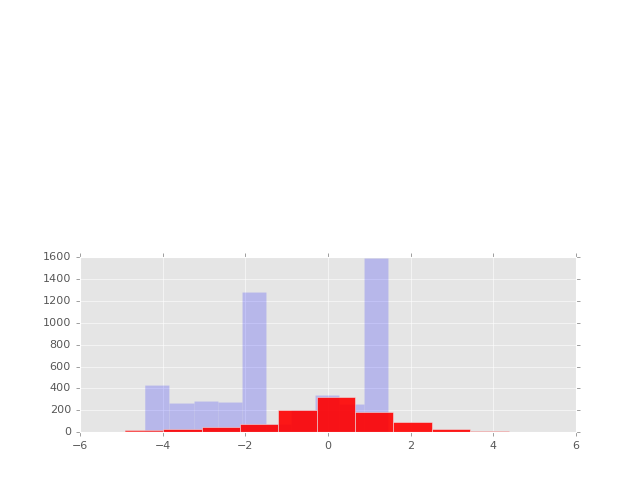

<IPython.core.display.Javascript object>


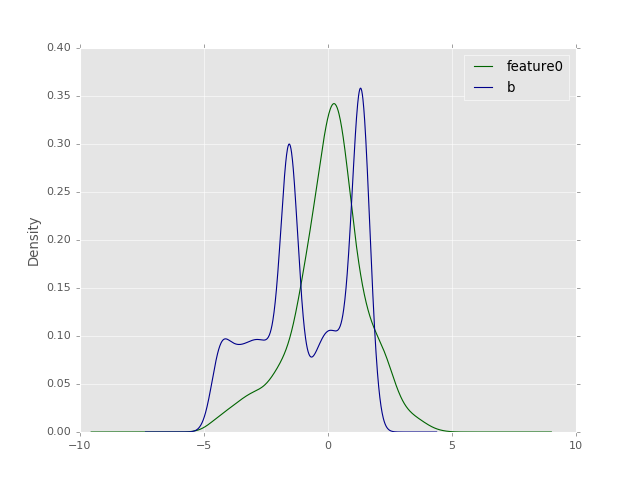

count    1000.000000
mean        0.013664
std         1.501590
min        -4.910405
25%        -0.728256
50%         0.161875
75%         0.850718
max         4.367489
Name: feature0, dtype: float64
count    5000.000000
mean       -0.845271
std         1.889095
min        -4.422874
25%        -2.064893
50%        -1.516209
75%         1.254428
max         1.446343
Name: b, dtype: float64


In [13]:
re_sampled_df = pd.DataFrame.from_csv('data/inverse.csv')
print("Shape of inverse: {}".format(re_sampled_df.shape))
print(re_sampled_df.head())
fig = plt.figure()
df1 = df['feature0']
df2 = re_sampled_df['b']

# histogram plots
ax = fig.add_subplot(212)
_ = ax.hist(df2.values, color='blue', alpha=0.2)
_ = ax.hist(df1.values, color='red', alpha=0.9)

# density plots
ax1 = df.plot(kind='density', color="DarkGreen", x='index', y='feature0')
re_sampled_df.plot(kind='density', color="Darkblue", x='a', y='b', ax=ax1)

#ax1 = plt.twinx()
#df1.plot(kind='kde', ax=ax1, color='blue')
#df2.plot(kind='kde', ax=ax1, color='green')
print(df1.describe())
print(re_sampled_df['b'].describe())
#df.plot(kind='density', color="DarkBlue", x='index', y='feature0')